In [1]:
import sys
sys.path.append('../')

from data import datasets
from data import transforms, target_transforms, augmentations, utils

from ssd.models.ssd300 import SSD300

from torch.utils.data import DataLoader
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
augmentaion = augmentations.Compose(
    []
)

transform = transforms.Compose(
    [transforms.Normalize(rgb_means=(103.939, 116.779, 123.68), rgb_stds=1),
     transforms.Resize((300, 300)),
     transforms.ToTensor()]
)
target_transform = target_transforms.Compose(
    [target_transforms.Ignore(difficult=True),
     target_transforms.ToCentroids(),
     target_transforms.OneHot(class_nums=datasets.VOC_class_nums),
     target_transforms.ToTensor()]
)

test_dataset = datasets.Compose(datasets.VOC_class_nums,
                                 datasets=(datasets.VOC2012_TrainValDataset,),
                                 transform=transform, target_transform=target_transform, augmentation=augmentaion)

test_loader = DataLoader(test_dataset,
                          batch_size=32,
                          shuffle=False,
                          collate_fn=utils.batch_ind_fn)

<IPython.core.display.Javascript object>


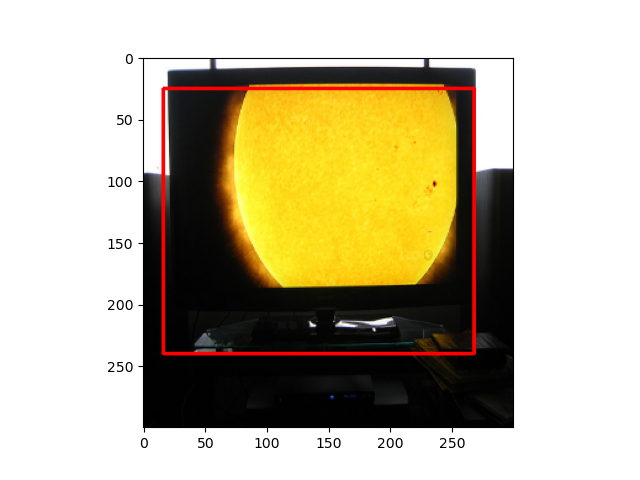

<IPython.core.display.Javascript object>


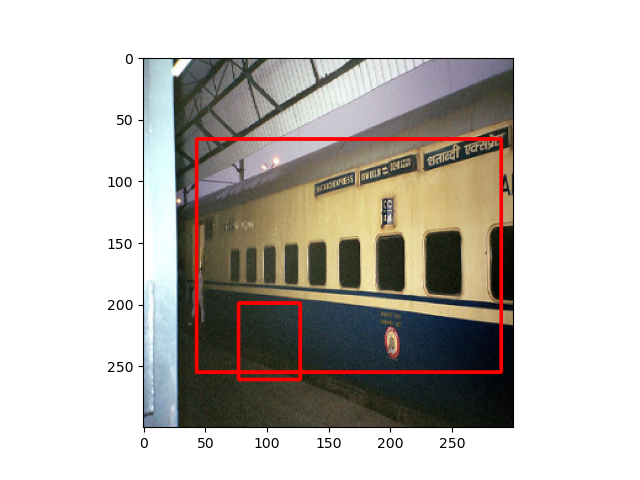

<IPython.core.display.Javascript object>


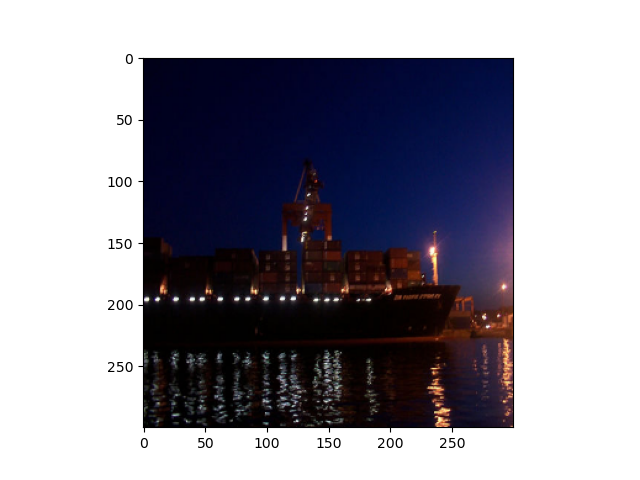

<IPython.core.display.Javascript object>


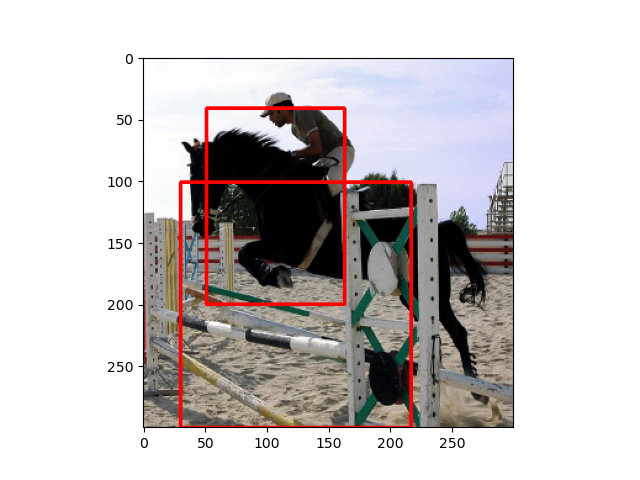

<IPython.core.display.Javascript object>


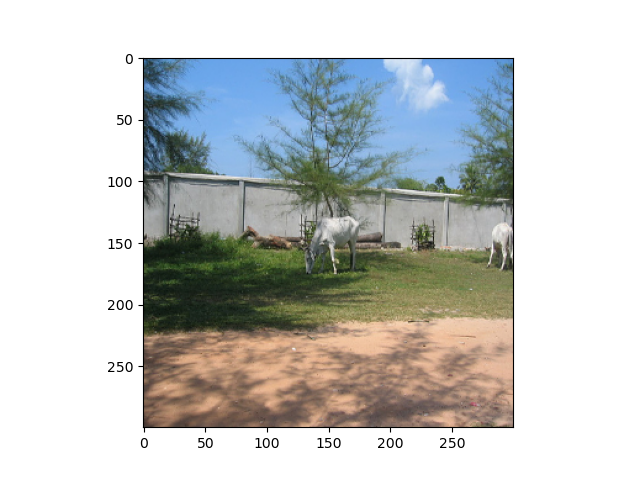

<IPython.core.display.Javascript object>


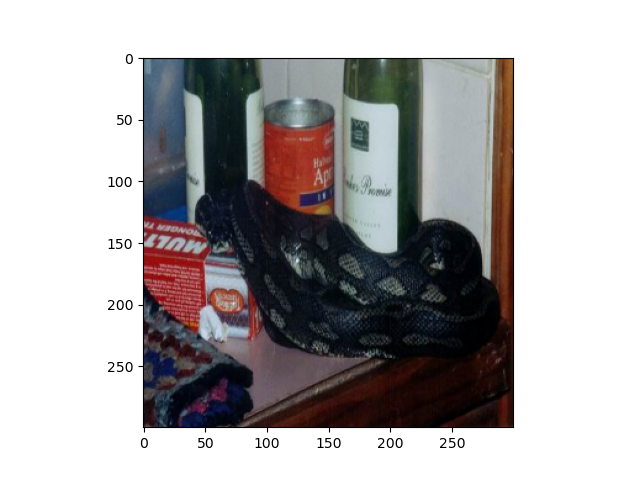

<IPython.core.display.Javascript object>


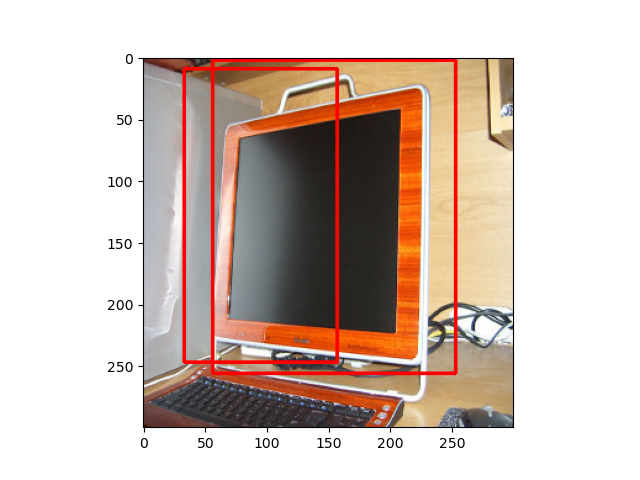

<IPython.core.display.Javascript object>


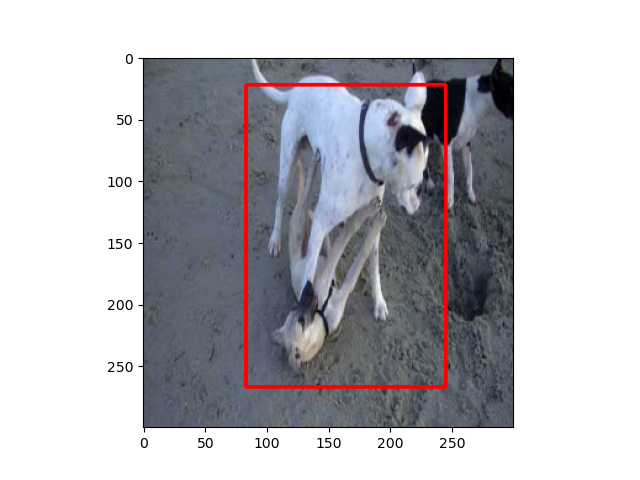

<IPython.core.display.Javascript object>


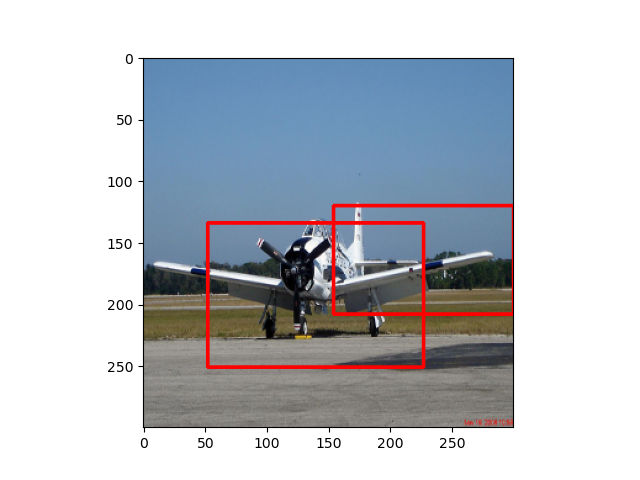

<IPython.core.display.Javascript object>


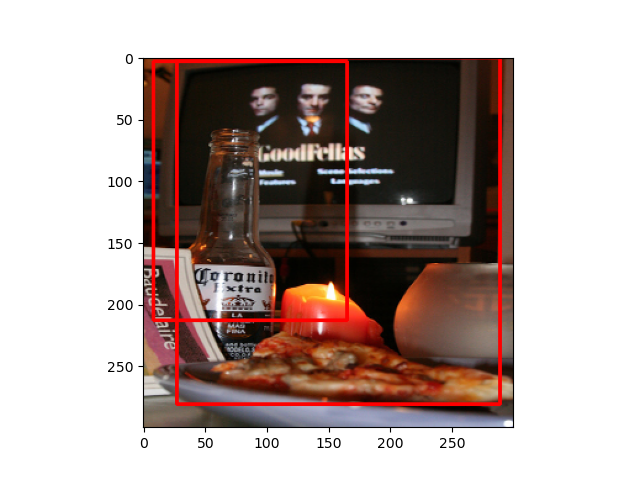

<IPython.core.display.Javascript object>


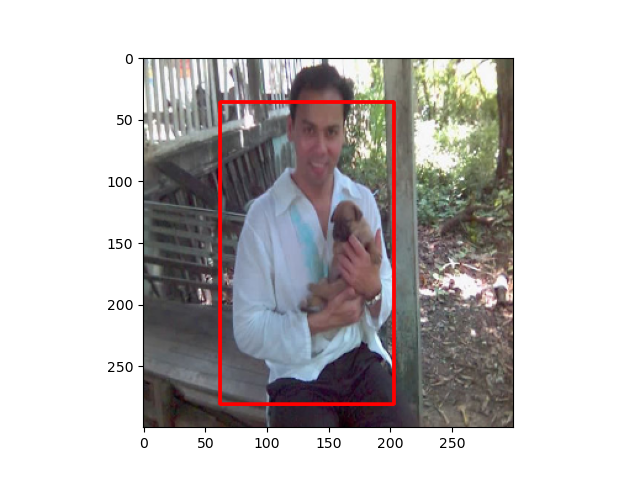

<IPython.core.display.Javascript object>


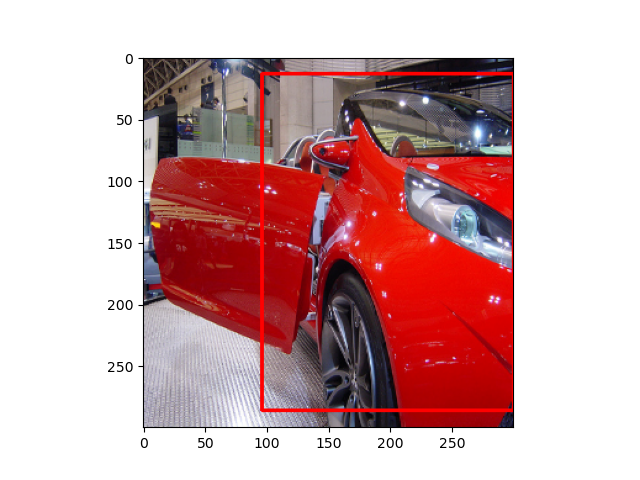

<IPython.core.display.Javascript object>


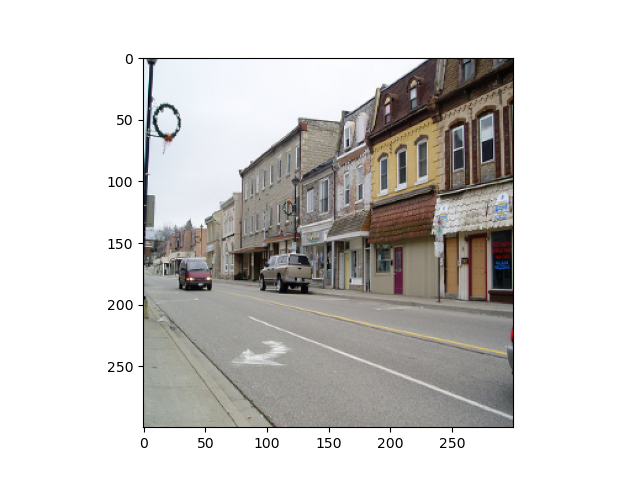

<IPython.core.display.Javascript object>


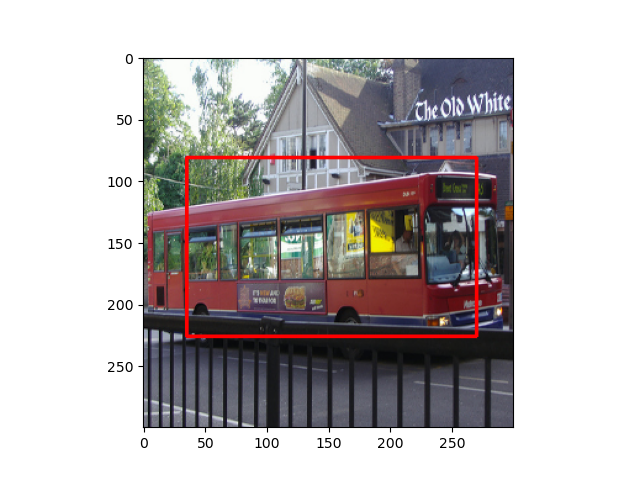

<IPython.core.display.Javascript object>


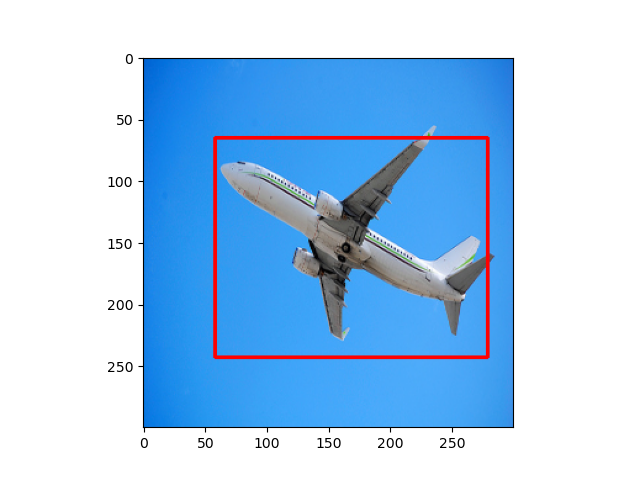

<IPython.core.display.Javascript object>


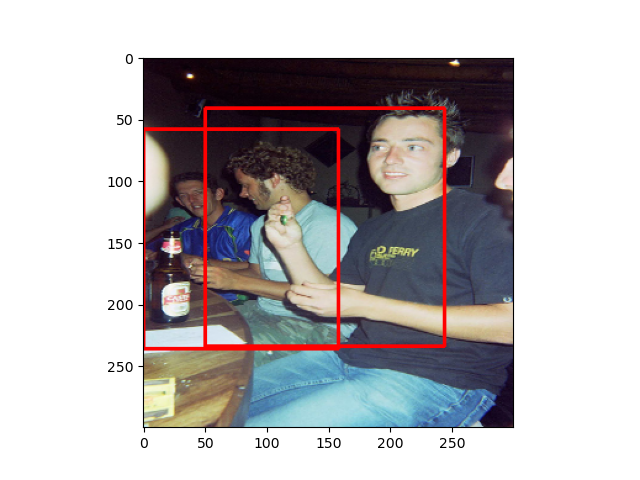

<IPython.core.display.Javascript object>


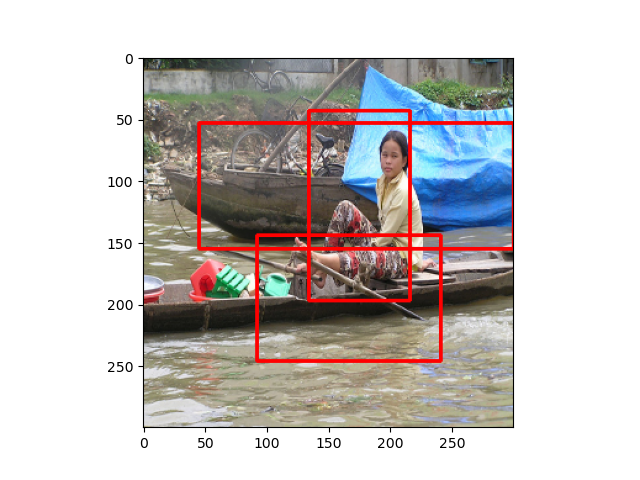

<IPython.core.display.Javascript object>


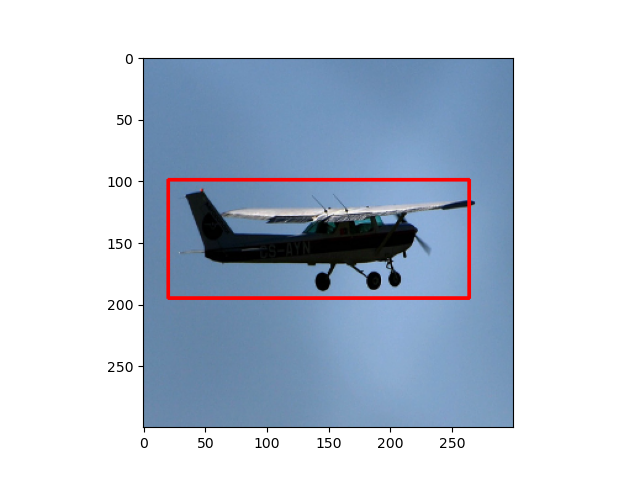

<IPython.core.display.Javascript object>


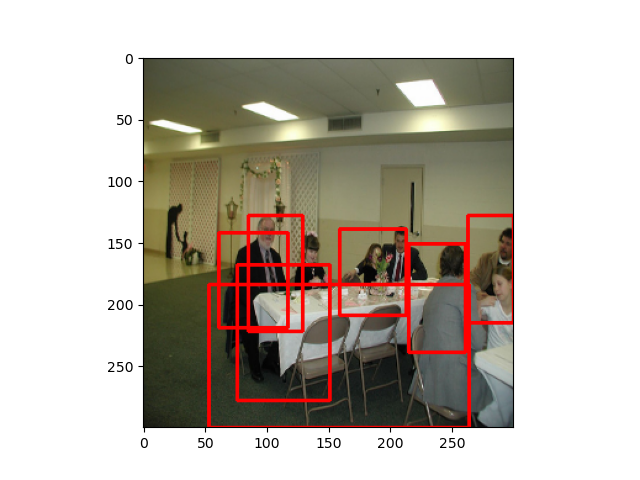

<IPython.core.display.Javascript object>


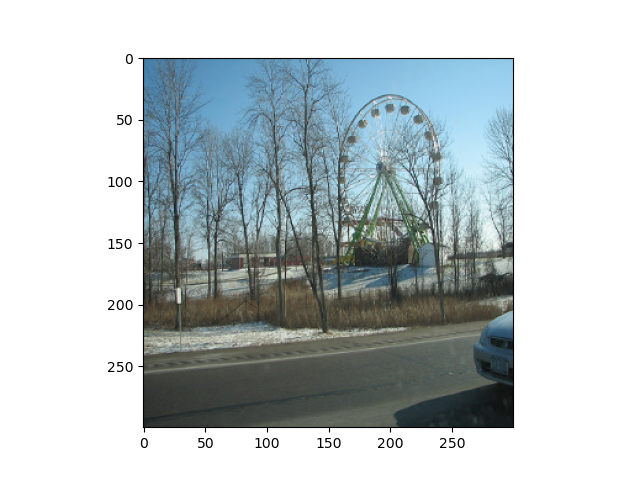

In [3]:
model = SSD300(class_nums=test_dataset.class_nums, batch_norm=False)
model.load_weights('../weights/ssd300-voc2007-no-augmentatio/ssd300-voc2007_i-0055000_checkpoints20200503.pth')
model.eval()

images = [test_dataset[i][0] for i in range(20)]
inf, ret_imgs = model.infer(images, visualize=True)

for img in ret_imgs:
    plt.figure()
    plt.imshow(img)